In [1]:
#IMPORTING THE REQUISITE LIBRARIES
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from pathlib import Path
from tqdm.auto import tqdm
import requests, io, os, tarfile
import zipfile
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern
import pandas as pd

In [2]:
#MOUNTING DRIVE
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#FINDING ROOT PATH OF THE FOLDER
for root, dirs, files in os.walk('/content/drive/MyDrive'):
    audio_files = [f for f in files if f.endswith('.mp3')]
    if audio_files:
        print(root)
        break

/content/drive/MyDrive/Genre_Classification/files_rock


In [4]:
#CREATING A FOLDER FOR ROCK
rock_folder = '/content/drive/MyDrive/Genre_Classification/files_rock'
files_rockk = [f for f in os.listdir(rock_folder) if f.endswith('.mp3')]

In [5]:
#CREATING A FOLDER FOR JAZZ
jazz_folder='/content/drive/MyDrive/Genre_Classification/files_jazz'
files_jazzz = [f for f in os.listdir(jazz_folder) if f.endswith('.mp3')]

In [6]:
#CREATING A MFCC FOLDER FOR ROCK
rock_folder = '/content/drive/MyDrive/Genre_Classification/files_rock'
mfcc_plot_folder = os.path.join(rock_folder, 'MFCC_Plots')
os.makedirs(mfcc_plot_folder, exist_ok=True)


In [7]:
#CREATING A MFCC FOLDER FOR JAZZ
mfcc_plot_folder2 = os.path.join(jazz_folder, 'MFCC_Plots')
os.makedirs(mfcc_plot_folder2, exist_ok=True)


In [8]:
#PLOTTING MFCC FOR ROCK
for file in files_rockk:
    filepath = os.path.join(rock_folder, file)
    y, sr = librosa.load(filepath)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', sr=sr)
    plt.colorbar()
    plt.title(f'MFCC - {file}')
    plt.tight_layout()
    plot_filename = os.path.splitext(file)[0] + '_mfcc.png'
    plot_path = os.path.join(mfcc_plot_folder, plot_filename)
    plt.savefig(plot_path)
    plt.close()


In [9]:
#PLOTTING MFCC FOR ROCK
for file in files_jazzz:
    filepath = os.path.join(jazz_folder, file)
    y, sr = librosa.load(filepath)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', sr=sr)
    plt.colorbar()
    plt.title(f'MFCC - {file}')
    plt.tight_layout()
    plot_filename = os.path.splitext(file)[0] + '_mfcc.png'
    plot_path = os.path.join(mfcc_plot_folder2, plot_filename)
    plt.savefig(plot_path)
    plt.close()


In [10]:
#COMPUTING LBP FOR ROCK
import os
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import local_binary_pattern
import matplotlib.pyplot as plt
import pandas as pd

radius = 1
n_points = 8 * radius
method = 'uniform'
lbp_matrices_from_images = {}
feature_vectors = []
for file in os.listdir(mfcc_plot_folder):
    i=0
    if file.endswith('.png'):
        img_path = os.path.join(mfcc_plot_folder, file)
        image = imread(img_path)
        if image.shape[2] == 4:
            image = image[:, :, :3]
        gray_image = rgb2gray(image)
        #print(gray_image.shape)
        gray_uint8 = (gray_image * 255).astype(np.uint8)
        lbp_matrix = local_binary_pattern(gray_uint8, n_points, radius, method)
        #print(lbp_matrix.shape)
        hist, _ = np.histogram(lbp_matrix.ravel(), bins=np.arange(0, lbp_matrix.max() + 2), density=True)
        #print(i, hist)
        #print(hist.shape)
        i+=1
        feature_vectors.append(hist)
        #lbp_matrices_from_images[file] = lbp_matrix
rock_feat = np.array(feature_vectors)
print(rock_feat.shape)
output_path = '/content/drive/MyDrive/Genre_Classification/rock_lbp2.csv'
np.savetxt(output_path, rock_feat, delimiter=',')

(10, 10)


In [11]:
#COMPUTING LBP FOR JAZZ
radius = 1
n_points = 8 * radius
method = 'uniform'
lbp_matrices_from_images = {}
feature_vectors = []
for file in os.listdir(mfcc_plot_folder2):
    i=0
    if file.endswith('.png'):
        img_path = os.path.join(mfcc_plot_folder2, file)
        image = imread(img_path)
        if image.shape[2] == 4:
            image = image[:, :, :3]
        gray_image = rgb2gray(image)
        #print(gray_image.shape)
        gray_uint8 = (gray_image * 255).astype(np.uint8)
        lbp_matrix = local_binary_pattern(gray_uint8, n_points, radius, method)
        #print(lbp_matrix.shape)
        hist, _ = np.histogram(lbp_matrix.ravel(), bins=np.arange(0, lbp_matrix.max() + 2), density=True)
        #print(i, hist)
        i+=1
        feature_vectors.append(hist)
        #lbp_matrices_from_images[file] = lbp_matrix
jazz_feat = np.array(feature_vectors)
print(jazz_feat.shape)
output_path = '/content/drive/MyDrive/Genre_Classification/jazz_lbp2.csv'
np.savetxt(output_path, jazz_feat, delimiter=',')
print(jazz_feat, jazz_feat.shape)

(10, 10)
[[0.000000e+00 7.535000e-03 2.850000e-04 1.004250e-02 5.700000e-03
  2.136125e-01 6.320000e-03 5.800000e-03 6.072550e-01 1.434500e-01]
 [2.500000e-06 1.597500e-03 7.750000e-05 1.415750e-02 5.025000e-03
  2.809625e-01 8.860000e-03 3.340000e-03 6.562950e-01 2.968250e-02]
 [2.500000e-06 1.862500e-03 1.175000e-04 1.464750e-02 5.110000e-03
  2.909225e-01 9.400000e-03 3.377500e-03 6.407875e-01 3.377250e-02]
 [2.500000e-06 1.455000e-03 8.750000e-05 1.471250e-02 4.645000e-03
  2.834175e-01 8.980000e-03 3.132500e-03 6.581275e-01 2.544000e-02]
 [2.500000e-06 5.175000e-04 6.500000e-05 1.411000e-02 3.777500e-03
  2.662350e-01 8.682500e-03 2.805000e-03 6.953500e-01 8.455000e-03]
 [2.500000e-06 1.702500e-03 1.275000e-04 1.483000e-02 4.767500e-03
  2.919625e-01 9.632500e-03 3.030000e-03 6.449400e-01 2.900500e-02]
 [2.500000e-06 1.272500e-03 8.250000e-05 1.431250e-02 4.667500e-03
  2.845950e-01 9.357500e-03 3.200000e-03 6.601200e-01 2.239000e-02]
 [2.500000e-06 1.085000e-03 7.500000e-05 1.377

In [12]:
#STACKING THE OUTPUT LBP FILES
from numpy import genfromtxt
rock_data = genfromtxt('/content/drive/MyDrive/Genre_Classification/rock_lbp2.csv', delimiter=',')
jazz_data = genfromtxt('/content/drive/MyDrive/Genre_Classification/jazz_lbp2.csv', delimiter=',')
X = np.vstack((rock_data, jazz_data))
print(X.shape)
y = [0]*10 + [1]*10
y = np.array(y)
print(X.shape, y.shape)
print(X, y)

(20, 10)
(20, 10) (20,)
[[0.000000e+00 8.472500e-03 3.625000e-04 1.112750e-02 5.605000e-03
  2.232775e-01 7.027500e-03 5.430000e-03 5.808225e-01 1.578750e-01]
 [0.000000e+00 3.405000e-03 1.000000e-04 1.626000e-02 5.015000e-03
  3.084675e-01 1.039750e-02 3.295000e-03 5.905900e-01 6.247000e-02]
 [0.000000e+00 3.715000e-03 1.675000e-04 1.622250e-02 5.065000e-03
  3.169000e-01 1.099500e-02 2.895000e-03 5.765775e-01 6.746250e-02]
 [0.000000e+00 4.952500e-03 2.200000e-04 1.555250e-02 5.472500e-03
  3.111675e-01 1.035250e-02 3.107500e-03 5.578225e-01 9.135250e-02]
 [2.500000e-06 4.700000e-03 1.700000e-04 1.557000e-02 5.402500e-03
  3.192075e-01 1.086500e-02 3.067500e-03 5.567125e-01 8.430250e-02]
 [0.000000e+00 4.942500e-03 1.900000e-04 1.535750e-02 5.342500e-03
  3.199125e-01 1.109500e-02 2.622500e-03 5.478850e-01 9.265250e-02]
 [2.500000e-06 6.350000e-03 2.175000e-04 1.424750e-02 5.325000e-03
  2.875900e-01 9.577500e-03 3.232500e-03 5.559725e-01 1.174850e-01]
 [0.000000e+00 5.592500e-03 1.9

In [13]:
#COMPUTING FDR
X1 = X[:10,:]
X2 = X[10:,:]
print(X1.shape, X2.shape)
m1 = np.mean(X1, axis=0)
s1 = np.std(X1, axis=0)
m2 = np.mean(X2, axis=0)
s2 = np.std(X2, axis=0)
print(m1.shape, m2.shape, s1.shape, s2.shape)
fdr = (m1 - m2) ** 2 / (s1 ** 2 + s2 ** 2 + 1e-6)
print(fdr)

(10, 10) (10, 10)
(10,) (10,) (10,) (10,)
[1.56249678e-06 1.96390398e+00 7.33325029e-03 2.89435228e-01
 3.67903101e-01 5.79099979e-01 6.85880648e-01 9.89931519e-06
 8.54703244e+00 2.17691795e+00]


[np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0), np.float64(1.0)]


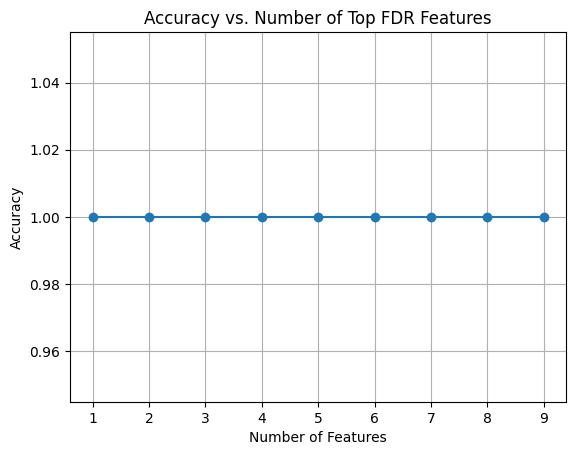

In [15]:
#IMPLEMENTING TRAIN TEST SPLIT METHOD
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

fdr_index = np.argsort(fdr)
fdr = fdr[::-1]
X = X[:, fdr_index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train1 = X_train.copy()
X_test1 = X_test.copy()
accuracies = []
for i in range(1, X_train.shape[1]):
    X_train1 = X_train1[:, :i]
    X_test1 = X_test1[:, :i]
    clf = SVC(kernel='linear')
    clf.fit(X_train1, y_train)
    y_pred = clf.predict(X_test1)
    acc = np.mean(y_pred == y_test)
    accuracies.append(acc)
print(accuracies)
plt.plot(range(1, len(accuracies) + 1), accuracies, marker='o')
plt.title('Accuracy vs. Number of Top FDR Features')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()
